In [4]:
import numpy as np
import pandas as pd

%run _color_tools.ipynb

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


In [188]:
region_sizes = pd.read_csv("../outputs/stats_region_size.tsv", sep="\t")
region_sizes = region_sizes.query("region != 'start_proximal'")

In [334]:
def plot_region_sizes(df, ax, region="transcript", legend=False, xlabel=False):

    df = df.query(f"region == '{region}'").drop("region", axis=1)

    colors = {"constrained": C.red, "unconstrained": C.grey, "indeterminate": adjust_lightness(C.grey, 0.5)}

    labels = {
        "transcript": "Transcript",
        "nmd_target": "NMD Target",
        "long_exon": "Long Exon",
        "distal_nmd": "Distal",
        "start_proximal": "Start Proximal",
    }

    n = df.constraint.nunique()
    y = np.arange(n)
    # x = df[metric]

    sns.violinplot(
        ax=ax,
        data=df,
        x="size",
        y = "constraint",
        width=0.9,
        cut=2,
        gridsize=1000,
        palette=colors,
        order=["constrained","indeterminate","unconstrained"],
        scale="width",
        inner="quartiles",
    )
    ax.set_ylabel(labels[region], rotation=0, ha="right", va="center")
    ax.set_yticks([])
    # ax.set_xscale("log")
    # ax.set_yticks(ticks=[1], labels=[labels[region]],)
    ax.tick_params(axis="y", length=0, pad=7)
    ax.set_xlim((0,3000))
    
    ax.set_xlabel(None)
    if xlabel: ax.set_xlabel(xlabel)
    
    # Rely on legend from adjacent plots
    if legend:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1], labels[::-1], labelspacing=1, loc="center right", handleheight=n/2)
    
    return None

In [335]:
cm = 1 / 2.54

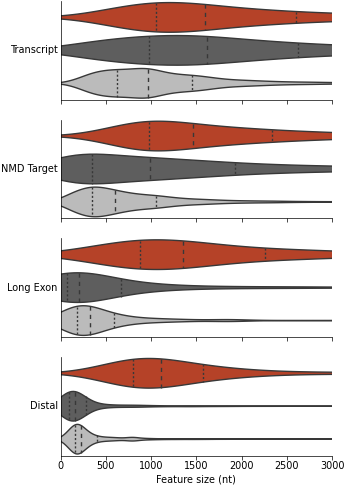

In [336]:
fig, axs = plt.subplots(4, 1, figsize=(8.9 * cm, 15 * cm), sharex=True)

plot_region_sizes(region_sizes, axs[0], "transcript")
plot_region_sizes(region_sizes, axs[1], "nmd_target")
plot_region_sizes(region_sizes, axs[2], "long_exon")
plot_region_sizes(region_sizes, axs[3], "distal_nmd", xlabel="Feature size (nt)", legend=True)